# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
df = pd.read_csv('data/human_body_temperature.csv')

<h3> Is the distribution of body temperatures normal? </h3>

##### Exteral resources
http://www.psychwiki.com/wiki/How_do_I_determine_whether_my_data_are_normal%3F 

<p> To understand distribution of a given parameter. histogram is better suited</p>



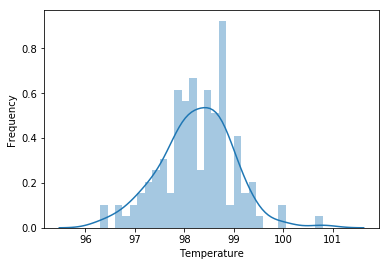

In [25]:
_= sns.distplot(df.temperature, bins= 30)
_= plt.xlabel('Temperature')
_= plt.ylabel('Frequency')
_= plt.show()

#### Distrution is not Normal. Quick look at temperature histogram we can conclude that distribution is slightly left skewed but for all practical purposes this is a normal (after discussion with lucas)

##### Drawback with histogram is binning bias. may not be relevant in current situation. 
##### for more accurate result lets plot ECDF.

In [26]:
def ecdf(data):
     n = len(data)
     x = np.sort(data)
     y = np.arange(1, n+1)/n
     return x,y

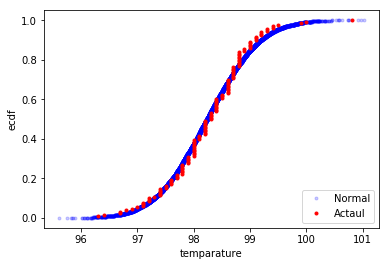

In [27]:
# ECDF for Normal distribution of temparature 
mean_temp = np.mean(df.temperature)
std_temp = np.std(df.temperature)
noraml_temp = np.random.normal(mean_temp,std_temp,10000)
x_normal,y_normal = ecdf(noraml_temp) 

# ECDF for actual distribution of temparature
x_obse,y_obse = ecdf(df.temperature)

# plot both actaul distruntion and Normal (therotical) distribution.   
_= plt.plot(x_normal,y_normal, marker='.',linestyle='none',color='blue',alpha=0.2)
_= plt.plot(x_obse,y_obse,marker='.',linestyle='none',color='red')

# legend and plot lables
_= plt.xlabel('temparature')
_= plt.ylabel('ecdf')
_= plt.legend(['Normal', 'Actaul'], loc='lower right')

plt.show()


### 2. Is the sample size large? Are the observations independent? 

In [42]:
no_of_observations = len(df.temperature)

##### “When a sample has more than 30 observations, 
##### the normal distribution can be used in place of the t distribution.
##### ~ Applied Statistics for Public and Nonprofit Administration (Meier et.al) p. 191.” 

# Sample size is large enough and i see no reason to believe observations are dependent.

### 3. Is the true population mean really 98.6 degrees F?

##### H0 (null hypothesis)  : Population mean (mu) = 98.6 F
##### Ha (alternative hypothesis) : Population mean (mu) !=  98.6 F 




In [45]:
sample_mean = np.mean(df.temperature)
sample_std = np.std(df.temperature)

std_error = sample_std / np.sqrt(no_of_observations)
Z_value = (sample_mean - pop_mean) /  std_error 

##### Critical value for 95% confidence interval is 1.96
critical_value = 1.96

<p> As z-value values falls beyond range (-1.96 to 1.96). So reject Null hypothesis.
    So, <b> Population mean is NOT 98.6 F </b>
    </p>

##### Q1. Would you use a one-sample or two-sample test? Why? 
<p>
<b>Ans: One sample Z-test because of </b> 
One-sample Z-tests are used to compare a sample mean with the known population mean. 
Two-sample Z-tests, the other hand, are used to compare either independent samples or dependent samples.
</p>

##### Q2.  In this situation, is it appropriate to use the tt or zz statistic?  
<p> Ans: t-statistic is applicable, if we have observations less than 30 and population standard deviation is missing.
z-statistic is applicable, if population standard deviation is avaialble and observations more than 30 </p>
<b> I choose Z test </b>

##### Q3.  Now try using the other test. How is the result be different? Why? 

In [57]:
samp_size = 25
critical_value = 3.078  # 97.5% confidence interval with 24 degrees of freedom.

sample_permutation = np.random.choice(df.temperature,samp_size)

sample_mean = np.mean(sample_permutation)
sample_std = np.std(sample_permutation)

std_error = sample_std / np.sqrt(no_of_observations)

t_value = (sample_mean - pop_mean) /  std_error

<p>
As t_value falls towards left of citical range (-3.078 to 3.078).
<b> So reject Null Hypothesis </b>
</p>

### 4. At what temperature should we consider someone's temperature to be "abnormal"? 

#### Confidence Interval = (sample_mean +- critical_value(97.5% confidence)* (sample std / sqrt(observation)))

In [62]:
sig_interval =  critical_value * (sample_std / np.sqrt(samp_obser))

In [87]:
min_value = sample_mean + sig_interval
max_value = sample_mean - sig_interval
print(min_value)
print(max_value)

98.7562584855
98.0197415145


#### Any value beyond min_value and max_value is considered as abnormal

## 5. Is there a significant difference between males and females in normal temperature? 

<p> 
    <b> H0 (Null hypothesis) : Mean temp of male  is same as mean temp of female. </b> <br> </br>
    <b> Ha (Alternative hypothesis) : Mean temp of male  is different from mean temp of female. </b> 
</p>

In [83]:
male_temp = df[df.gender == 'M'].temperature
female_temp = df[df.gender == 'F'].temperature
samp_size = 25

male_temp_sample = np.random.choice(male_temp,samp_size)
female_temp_sample = np.random.choice(female_temp,samp_size)

male_temp_sample_mean = np.mean(male_temp_sample)
female_temp_sample_mean = np.mean(female_temp_sample)

male_temp_sample_var = np.var(male_temp_sample)
female_temp_sample_var = np.var(female_temp_sample)

t_value = (male_temp_sample_mean - female_temp_sample_mean) / \
np.sqrt((male_temp_sample_var/samp_size) + (female_temp_sample_var/samp_size))

critical_value = 3.078

reject H0 if abs(t_value) > critical_value. In this case abs(t_value) < critical_value, 
<p> <b> so H0 is more likely. </b> </p>

reference : http://www.itl.nist.gov/div898/handbook/eda/section3/eda353.htm

### Conclusion : Human body temparature ranges b/w 98 and 98.75 with no impact on sex.